# Fusion de fichiers

In [29]:
import pandas as pd

data_without_contrib = pd.read_csv("data_final.csv")
data_contrib = pd.read_csv("contributeurs.csv", index_col=0)
data = pd.merge(data_without_contrib, data_contrib, left_index=True, right_index=True)
data.to_csv("data.csv")
data.head()

,name,full_name,url,description,stars,created_at,language,forks,updated_at,topics,license,type_of_owner,contributors
0,HyperDbg,HyperDbg/HyperDbg,https://github.com/HyperDbg/HyperDbg,State-of-the-art native debugging tool,2173,2020-01-01 12:34:32+00:00,C,317,2023-06-23 10:17:49+00:00,"['debug', 'debugger', 'ept', 'hook', 'hyperdbg...","{'key': 'gpl-3.0', 'name': 'GNU General Public...",Organization,"{'src_repository': 'HyperDbg/HyperDbg', 'contr..."
1,octo4a,feelfreelinux/octo4a,https://github.com/feelfreelinux/octo4a,Use your old Android device as an OctoPrint se...,1265,2020-01-01 17:00:11+00:00,Kotlin,123,2023-06-21 22:24:04+00:00,"['3d-printing', 'android', 'octoprint']","{'key': 'agpl-3.0', 'name': 'GNU Affero Genera...",User,"{'src_repository': 'feelfreelinux/octo4a', 'co..."
2,VIMKiller,caseykneale/VIMKiller,https://github.com/caseykneale/VIMKiller,Exiting VIM is hard; sometimes we need to take...,1159,2020-01-01 01:31:29+00:00,Julia,13,2023-06-21 16:37:23+00:00,[],"{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,"{'src_repository': 'caseykneale/VIMKiller', 'c..."
3,OpenSeeFace,emilianavt/OpenSeeFace,https://github.com/emilianavt/OpenSeeFace,Robust realtime face and facial landmark track...,1105,2020-01-01 12:49:35+00:00,Python,134,2023-06-23 11:37:45+00:00,"['cpu', 'csharp', 'depth-estimation', 'detecti...","{'key': 'bsd-2-clause', 'name': 'BSD 2-Clause ...",User,"{'src_repository': 'emilianavt/OpenSeeFace', '..."
4,react-typescript-web-extension-starter,aeksco/react-typescript-web-extension-starter,https://github.com/aeksco/react-typescript-web...,:desktop_computer: Web Extension starter kit b...,805,2020-01-01 01:14:35+00:00,JavaScript,73,2023-06-18 12:59:14+00:00,"['brave', 'chrome-extension', 'eslint', 'exten...","{'key': 'mit', 'name': 'MIT License', 'spdx_id...",User,{'src_repository': 'aeksco/react-typescript-we...


# Modèle Conceptuel de Données (MCD)

Trouver les concepts associés et les associations inhérentes. Les concepts que nous avons trouvés sont:
- Dépots
- Contributeurs
- Sujets
- License

Dépots
- id_repo (clé primaire)
- Nom
- Etoiles
- url
- description
- created_at
- Forks
- updated_at
- type_of_owner


Contributeurs
- id_contrib (clé primaire)
- contrib_nom


Sujets
- topic_id (clé primaire)
- topic_name


Licenses
- license_id (clé primaire)
- license_name

# Modèle Logique des Données (MLD)

Cette étape va consiter à définir le type de relation entre les différents concepts. Une chose est claire, la relation entre l'entité Depot est les autres est une relation many-to-many. Sur cette base, nous allons consytruire notre MLD.

DepotsLicenses
- repo_id (clé étrangère référençant la table Depots)
- license_id (clé étrangère référençant la table License)

DepotsContributeurs
- repo_id  (clé étrangère référençant la table Depots)
- contrib_id (clé étrangère référençant la table Contributeurs)

DepotsTopics
- repo_id (clé étrangère référençant la table Depots)
- topic_id (clé étrangère référençant la table Sujets)

Avec le,SGBDR PostgreSQL, nous avons générer l'ERD (le diagramme d'entité relation)

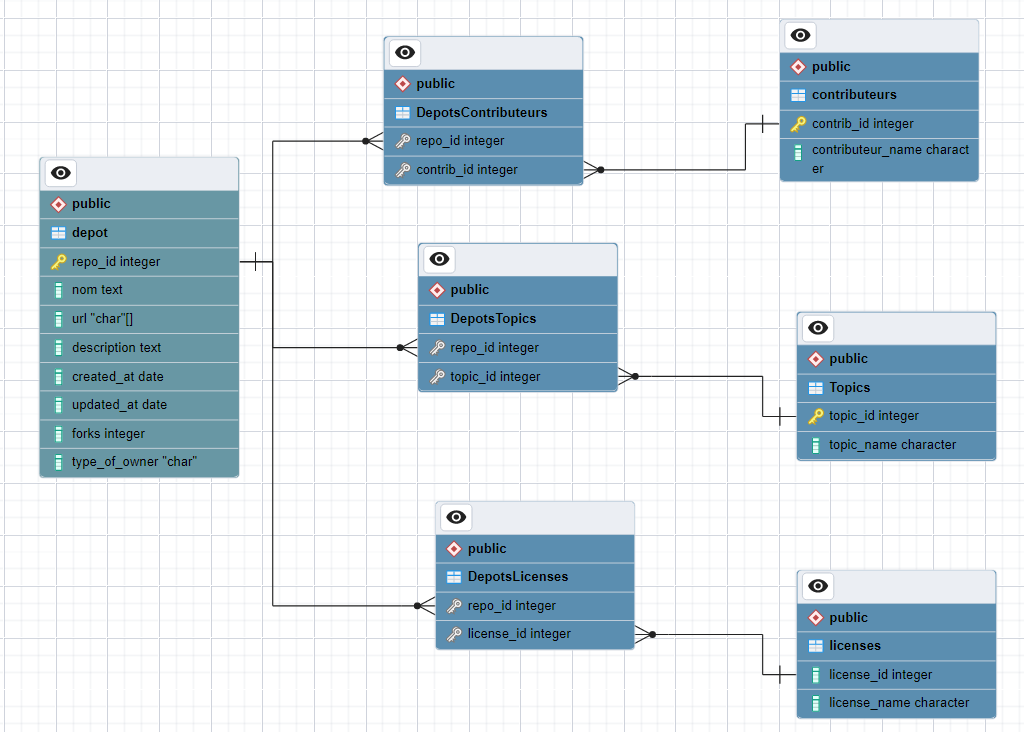

# Modèle Physique de Données (MPD)

Cette étape va consister à faire des scripts python pour gérer la base de données

In [25]:
import pyodbc
driver= '{ODBC Driver 17 for SQL Server}'

connexion = pyodbc.connect(
    Trusted_Connection='Yes',
    Driver='{ODBC Driver 17 for SQL Server}',
    Server='LAPTOP-L0N961TQ\SQLEXPRESS',
    Database='GitHub_Database'
)

In [29]:
# curseur
# cursor = connexion.cursor()

# Langage de Définition (LDD) (voir le fichier .sql associé)

### Création des tables entités

In [ ]:
# # Création de la table Depots
# cursor.execute("CREATE TABLE Depots ( id_repo INTEGER PRIMARY KEY, nom NVARCHAR(255), etoiles INTEGER, url NVARCHAR(255), description NVARCHAR(MAX), created_at DATE, forks INTEGER, watchers INTEGER, updated_at DATE, type_of_owner NVARCHAR(255) );")

In [ ]:
# # Création de la table Contributeurs
# cursor.execute("CREATE TABLE Contributeurs (id_contrib INT PRIMARY KEY,contrib_nom NVARCHAR(255));")

In [ ]:
# # Création de la table Topics
# cursor.execute("CREATE TABLE Topics (topic_id INT PRIMARY KEY,topic_name NVARCHAR(255));")

In [ ]:
# # Création de la table Licenses
# cursor.execute("CREATE TABLE Licenses (license_id INT PRIMARY KEY,license_name NVARCHAR(255));")

### Création des tables-relations

In [ ]:
# # Création de la table-relation Depot-Licenses
# cursor.execute("CREATE TABLE DepotsLicenses (repo_id INT,license_id INT,FOREIGN KEY (repo_id) REFERENCES Depots(id_repo),FOREIGN KEY (license_id) REFERENCES Licenses(license_id));")

In [ ]:
# # Création de la table-relation Depot-Contributeurs
# cursor.execute("CREATE TABLE DepotsContributeurs (repo_id INT,contrib_id INT,FOREIGN KEY (repo_id) REFERENCES Depots(id_repo),FOREIGN KEY (contrib_id) REFERENCES Contributeurs(id_contrib)
# );")

In [ ]:
# # Création de la table-relation Depot-Topics
# cursor.execute("CREATE TABLE DepotsTopics (repo_id INT,topic_id INT,FOREIGN KEY (repo_id) REFERENCES Depots(id_repo),FOREIGN KEY (topic_id) REFERENCES Topics(topic_id));")

# Langage de Manipultion de Données

In [21]:
data.head(2)

,name,full_name,url,description,stars,created_at,language,forks,updated_at,topics,license,type_of_owner,contributors
0,HyperDbg,HyperDbg/HyperDbg,https://github.com/HyperDbg/HyperDbg,State-of-the-art native debugging tool,2173,2020-01-01 12:34:32+00:00,C,317,2023-06-23 10:17:49+00:00,"['debug', 'debugger', 'ept', 'hook', 'hyperdbg...","{'key': 'gpl-3.0', 'name': 'GNU General Public...",Organization,"{'src_repository': 'HyperDbg/HyperDbg', 'contr..."
1,octo4a,feelfreelinux/octo4a,https://github.com/feelfreelinux/octo4a,Use your old Android device as an OctoPrint se...,1265,2020-01-01 17:00:11+00:00,Kotlin,123,2023-06-21 22:24:04+00:00,"['3d-printing', 'android', 'octoprint']","{'key': 'agpl-3.0', 'name': 'GNU Affero Genera...",User,"{'src_repository': 'feelfreelinux/octo4a', 'co..."


In [30]:
with open("data.csv", 'r') as file:
    # Ignorer l'en-tête du fichier CSV s'il en existe un
    next(file)
    
    # Parcourir les lignes du fichier
    for line in file:
        # Séparer les valeurs des colonnes
        values = line.strip().split(',')
        print(values[5])

UnicodeDecodeError: 'charmap' codec can't decode byte 0x81 in position 4524: character maps to <undefined>

In [31]:
cursor = connection.cursor()

# Chemin vers le fichier de données
data_file_path = "data.csv"

# Lecture du fichier de données
with open(data_file_path, 'r') as file:
    # Ignorer l'en-tête du fichier CSV s'il en existe un
    next(file)
    
    # Parcourir les lignes du fichier
    for line in file:
        # Séparer les valeurs des colonnes
        values = line.strip().split(',')
        
        # Récupérer les valeurs des colonnes
        id_repo = int(values[0])
        nom = values[2]
        etoiles = int(values[5])
        url = values[3]
        description = values[4]
        created_at = values[6]
        langage= values[7]
        forks = int(values[8])
        updated_at = values[10]
        type_of_owner = values[13]
        
        # Requête d'insertion des données dans la table Depots
        query = "INSERT INTO Depots (id_repo, Nom, Etoiles, url, description, created_at, Forks, watchers, updated_at, type_of_owner) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"
        params = (id_repo, nom, etoiles, url, description, created_at, forks, watchers, updated_at, type_of_owner)
        
        # Exécution de la requête d'insertion
        cursor.execute(query, params)
        connection.commit()

# Fermeture de la connexion à la base de données
cursor.close()
connection.close()

NameError: name 'connection' is not defined